# Data Processing et model

In [175]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics


from sklearn import metrics

# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
#classe pour l'ACP
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
#classe pour l'ACP
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

#KMEan
from sklearn.cluster import KMeans
from sklearn import datasets

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.inspection import permutation_importance

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans
from sklearn import datasets


### Recupération du Dataframe EDA

In [176]:
#Récuperation du dataframe du notebook EDA
df_EDA = pd.read_csv("C:/Users/User/Desktop/Silicon_train/df_EDA.csv")
df_EDA.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


### Split du Dataframe brut en Train & Test

In [206]:
#On définit les features et la Target
X = df_EDA.drop(['median_house_value'], axis = 1)
y = df_EDA['median_house_value']

In [207]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

### Split du dataframe  manuel

In [ ]:
#Dans ce dataframe, je remplace les cases vides par la médiane et le one hot encoding je le fais de manière manuelle. 
#De manière à ne pas passer par les fct de Sklearn, donc je ne fit pas sur le test  

In [179]:
median_EDA = df_EDA
median_EDA.total_bedrooms.fillna(median_EDA.total_bedrooms.median(),inplace=True)
median_EDA.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [180]:
#Encoding, one hot encoding manuel 
encod_EDA = median_EDA.copy()
encod_EDA['INLAND'] = [1 if x == "INLAND" else 0 for x in encod_EDA['ocean_proximity']]
encod_EDA['<1H OCEAN'] = [1 if x == "<1H OCEAN" else 0 for x in encod_EDA['ocean_proximity']]
encod_EDA['NEAR OCEAN'] = [1 if x == "NEAR OCEAN" else 0 for x in encod_EDA['ocean_proximity']]
encod_EDA['NEAR BAY'] = [1 if x == "NEAR BAY" else 0 for x in encod_EDA['ocean_proximity']]
encod_EDA['ISLAND'] = [1 if x == "ISLAND" else 0 for x in encod_EDA['ocean_proximity']]

In [181]:
#supression de la colonne "Ocean_proximity"
encod_EDA = encod_EDA.drop("ocean_proximity", axis = 1)
encod_EDA.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,<1H OCEAN,NEAR OCEAN,NEAR BAY,ISLAND
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,1,0,0,0,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,0,1,0,0,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,1,0,0,0,0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,0,1,0,0,0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,1,0,0,0,0


In [182]:
#definir X et y
X = encod_EDA.drop(['median_house_value'], axis = 1)
y = encod_EDA['median_house_value']

In [183]:
# Splitting the data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=.3, random_state=1)

In [184]:
Df_train = X_train1.merge(y_train1, left_index=True, right_index=True)

### 1ère itération: Dummy Regressor 

In [185]:
#Dummy Regressor
dummy_regr = DummyRegressor()
dummy_regr.fit(X_train1, y_train1)
dummy_regr.score(X_test1,  y_test1)

-0.00036290962536944527

In [40]:
#le résultat du dummy regressor est tellement null qu'on ne peut que l'améliorer ! 

### 2ème Itération, Pipeline + Regression lineaire + StandardScale 

In [210]:
#On définit les features et la Target
X = df_EDA.drop(['median_house_value'], axis = 1)
y = df_EDA['median_house_value']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [188]:
# Séparation des colonnes numériques et categoriques
cat_trans = X_train.select_dtypes(include=["object"]).columns.tolist()
num_trans = X_train.select_dtypes(exclude=["object"]).columns.tolist()

# colonnes categorie pipeline
cat_preprocessing = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

# colonnes numeriques pipeline
num_preprocessing = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# pipeline commun 

preprocessing = ColumnTransformer([
    ("num", num_preprocessing, num_trans),
    ("cat", cat_preprocessing, cat_trans)
])

In [190]:
# pipe finale preprocessing & regression 
pipe_final = Pipeline(
    [
        ('preprocess', preprocessing),
        ('regressor', LinearRegression())
    ]
)

# Cross val 
scores = cross_val_score(
    pipe_final, X_train, y_train, cv=5
)
scores.mean()

0.6443418950023683

In [ ]:
#La cross validation nous donne un potentiel de 0,64 pour la regression lineaire
#Appliquons notre regression pour en savoir plus

In [201]:
# pipe finale preprocessing & regression 
pipe_final = Pipeline(
    [
        ('preprocess', preprocessing),
        ('regressor', LinearRegression())
    ]
)

# measure model performance

#Fit the model with the train set
reg_model = pipe_final.fit(X_train, y_train)

#Store predictions in a variable, for metrics uses
y_pred = pipe_final.predict(X_test)

# Evaluate the model with the test set
pipe_final.score(X_test, y_test)

r2 = pipe_final.score(X_test, y_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mae_pour = metrics.mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'r2 : {r2}')
print(f'mae : {mae}')
print(f'mae_pour : {mae_pour}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')

r2 : 0.6442059715211992
mae : 49430.23563332094
mae_pour : 0.28572992503475003
mse : 4640220231.537333
rmse : 68119.16199967035


In [ ]:
# Pour ce datasat, comme vu dans le notebook EDA, nous avons pas mal de outliers
# C'est outliers font partie intégrale des données et de la logique, ce ne sont pas des valeurs abérantes 
# la meilleur métrique à utiliqer dans notre cas est la MAE 
# La MAE ne cherche pas à éliminer ou écraser les outliers 

In [ ]:
# A ce stade, nous avons une MAE de de 49430 dollars
# Cela veut dire que notre prédiction est soit 49430 dollars de plus ou 49430 dollars de moins que le vrai prix
# Nous allons tenter de baisser la MAE 

# 3ème Itération, Pipeline + Regression lineaire + RobusteScale

In [ ]:
# Le robuste scaler est recommander dans le cas ou les features contiennent des outliers. Ce qui est notre cas.
# voyons si le RobusteScale va nous aider à améliorer nos prédictions 

In [231]:
#On définit les features et la Target
X = df_EDA.drop(['median_house_value'], axis = 1)
y = df_EDA['median_house_value']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [232]:
# Séparation des colonnes numériques et categoriques
cat_trans = X_train.select_dtypes(include=["object"]).columns.tolist()
num_trans = X_train.select_dtypes(exclude=["object"]).columns.tolist()

# colonnes categorie pipeline
cat_preprocessing = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

# colonnes numeriques pipeline
num_preprocessing = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

# pipeline commun 

preprocessing = ColumnTransformer([
    ("num", num_preprocessing, num_trans),
    ("cat", cat_preprocessing, cat_trans)
])

In [233]:
# pipe finale preprocessing & regression 
pipe_final = Pipeline(
    [
        ('preprocess', preprocessing),
        ('regressor', LinearRegression())
    ]
)

# measure model performance
#Fit the model with the train set
reg_model = pipe_final.fit(X_train, y_train)

#Store predictions in a variable, for metrics uses
y_pred = pipe_final.predict(X_test)

# Evaluate the model with the test set
pipe_final.score(X_test, y_test)

r2 = pipe_final.score(X_test, y_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mae_pour = metrics.mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'r2 : {r2}')
print(f'mae : {mae}')
print(f'mae_pour : {mae_pour}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')

r2 : 0.6442075789786466
mae : 49429.9494803057
mae_pour : 0.2857280668726842
mse : 4640199267.282814
rmse : 68119.00812022158


In [ ]:
# Le robuste scale a fait passer notre erreur d'estimation MAE de 49430 dollars à 49429 dollars
# Soit une amélioration de 1 dollars, ce qui n'est pas terrible !

# 4ème itération: Kmean + Regression Lineaire 

In [ ]:
# Pour cette 4ème itération, je vais tenter de faire un Kmean avant de faire ma régression lineaire 

In [ ]:
# J'utilise le dataframe que j'ai modifié manuellement sans fit sur le test 

In [213]:
df_Kmean = encod_EDA
df_Kmean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,<1H OCEAN,NEAR OCEAN,NEAR BAY,ISLAND
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,1,0,0,0,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,0,1,0,0,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,1,0,0,0,0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,0,1,0,0,0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,1,0,0,0,0


In [214]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_Kmean)
    distortions.append(kmeanModel.inertia_)

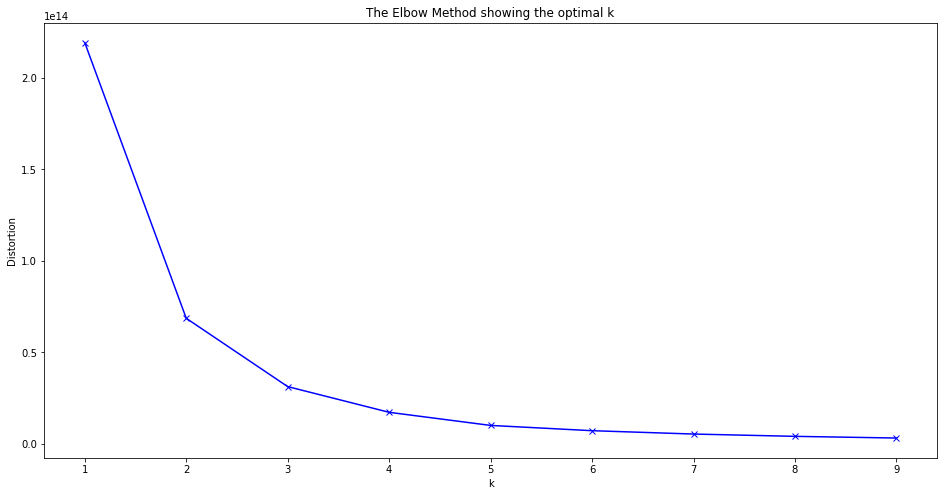

In [215]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
#Suite au résultat affiché ci-dessous avec le Elbow graph, je retiens 3 clusters pour mon dataset 

In [280]:
model = KMeans(n_clusters=3)
model.fit(df_Kmean)
model.predict(df_Kmean)
df_Kmean["k"] = model.predict(df_Kmean)
df_Kmean["k"].unique()

array([0, 2, 1])

In [ ]:
# Je fais un encoding sur les 3 clusters, car il n'y a pas de hiéarchie entre mes differents clusters 

In [217]:
#Encoding, one hot encoding manuel 
df_Kmean_en = df_Kmean.copy()
df_Kmean_en['0'] = [1 if x == "0" else 0 for x in df_Kmean_en['k']]
df_Kmean_en['1'] = [1 if x == "1" else 0 for x in df_Kmean_en['k']]
df_Kmean_en['2'] = [1 if x == "2" else 0 for x in df_Kmean_en['k']]
df_Kmean_en.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,<1H OCEAN,NEAR OCEAN,NEAR BAY,ISLAND,k,0,1,2
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,1,0,0,0,0,0,0,0,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,0,1,0,0,0,1,0,0,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,1,0,0,0,0,0,0,0,0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,0,1,0,0,0,1,0,0,0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,1,0,0,0,0,0,0,0,0


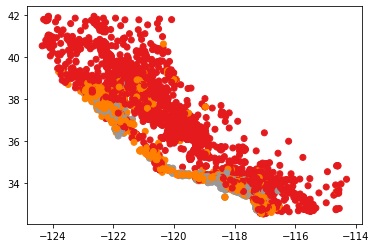

In [218]:
plt.scatter(df_Kmean["longitude"], df_Kmean["latitude"], c = df_Kmean["k"], cmap = plt.cm.Set1)

In [ ]:
# On remarque qu'il ya de grandes similitudes entre les clusters du Kmean et la répartition des prix en Californie
# On peut retrouver les deux quartiers les plus cher en gris, ensuite en orange les apparts sur la cote et en rouge le reste
# Je pense que le Kmean se base sur les features "ocean proximity", "latitude"

In [219]:
# Coef de silhouette
score = metrics.silhouette_score(df_Kmean, model.labels_,metric = "euclidean" )
score 

0.5691652917535269

In [ ]:
# Le coefficient de silhouette est pas mal 

In [ ]:
# Regression apres le Kmean 

In [228]:
df_Kmean_en.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,<1H OCEAN,NEAR OCEAN,NEAR BAY,ISLAND,k,0,1,2
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,1,0,0,0,0,0,0,0,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,0,1,0,0,0,1,0,0,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,1,0,0,0,0,0,0,0,0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,0,1,0,0,0,1,0,0,0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,1,0,0,0,0,0,0,0,0


In [ ]:
# Définir features et Target
X = df_Kmean.drop(["median_house_value"], axis = 1)
y = df_Kmean["median_house_value"]
# Split des données 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [255]:
# # Définir features et Target
# X = df_Kmean_en.drop(["median_house_value", "k"], axis = 1)
# y = df_Kmean_en["median_house_value"]
# # Split des données 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [252]:
# Pipe pour le df_Kmean deja encodé 
pipe = make_pipeline(StandardScaler(), LinearRegression())

# Fit the model with the train set
reg_lin = pipe.fit(X_train, y_train)

# Evaluate the model with the test set
pipe.score(X_test, y_test)

y_pred = reg_lin.predict(X_test)


r2 = pipe.score(X_test, y_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mae_pour = metrics.mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'r2 : {r2}')
print(f'mae : {mae}')
print(f'mae_pour : {mae_pour}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')

r2 : 0.878066440456881
mae : 31699.584326518234
mae_pour : 0.18746150095423522
mse : 1590241894.487149
rmse : 39877.83713401655


In [ ]:
# La regression lineaire à la suite du Kmean fait passer notre MAE de  49429 dollars à 49428 dollars
# Soit 1 dollars, je vais tester de changer d'algorithme et faire une KNN au lieu d'une regression 

### 5ème itération: Kmean + KNN 

In [257]:
# Définir features et Target
X = df_Kmean.drop(["median_house_value"], axis = 1)
y = df_Kmean["median_house_value"]
# Split des données 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [258]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

#Fit the model with the train set
reg_Knn = pipe.fit(X_train, y_train)

# Evaluate the model with the test set
pipe.score(X_test, y_test)

y_pred = reg_Knn.predict(X_test)

r2 = pipe.score(X_test, y_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mae1 = metrics.mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'r2 : {r2}')
print(f'mae : {mae}')
print(f'mae% : {mae1}')
print(f'mse : {mse}')
# print(f'rmse : {rmse}')

r2 : 0.8924045707881272
mae : 27329.682882519177
mae% : 0.15429399285795553
mse : 1403245831.8215504


In [ ]:
# Le Knn à la suite du Kmean fait passer notre MAE à 27329 dollars, c'est notre meilleur résultat de puis le debut 
# Je vais essayer d'améliorer sa avec des ajustements 

# 5ème itération, MinMaxScaler, Kmean, KNN

In [291]:
# Définir features et Target
X = df_Kmean.drop(["median_house_value"], axis = 1)
y = df_Kmean["median_house_value"]
# Split des données 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [292]:
pipe2 = make_pipeline(MinMaxScaler(), KNeighborsRegressor(n_neighbors=10))

In [293]:
#Fit the model with the train set
reg_Knn = pipe2.fit(X_train, y_train)

# Evaluate the model with the test set
pipe2.score(X_test, y_test)

y_pred = reg_Knn.predict(X_test)

r2 = pipe2.score(X_test, y_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mae1 = metrics.mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'r2 : {r2}')
print(f'mae : {mae}')
print(f'mae% : {mae1}')
print(f'mse : {mse}')
# print(f'rmse : {rmse}')

r2 : 0.9045381331754168
mae : 26661.541885345177
mae% : 0.15138662207252407
mse : 1245001462.4293964


In [ ]:
# Avec un MinMaxscaler, le Mae passe à 26661 dollars 

### Pipes pour pickle

### - Pipe Kmean

In [498]:
K_df = df_EDA.copy()
X2 = K_df 
X2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


In [499]:
# Séparation des colonnes numériques et categoriques
cat_trans = X2.select_dtypes(include=["object"]).columns.tolist()
num_trans = X2.select_dtypes(exclude=["object"]).columns.tolist()

# colonnes categorie pipeline
cat_preprocessing = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

# colonnes numeriques pipeline
num_preprocessing = Pipeline([
    ("imputer", SimpleImputer(strategy="median"))
    #("scaler", MinMaxScaler())
])

# pipeline commun 

preprocessing = ColumnTransformer([
    ("num", num_preprocessing, num_trans),
    ("cat", cat_preprocessing, cat_trans)
])

In [500]:
# pipe finale preprocessing & regression 
pipe_final_Kmean = Pipeline(
    [
        ('preprocess', preprocessing),
        ('regressor', KMeans(n_clusters=3))
    ]
)

# measure model performance

#Fit the model with the train set
Km = pipe_final_Kmean.fit(X2)

#Store predictions in a variable, for metrics uses
y_pred = pipe_final_Kmean.predict(X2)

In [501]:
df_f["k"] = pipe_final_Kmean.predict(X2)
df_f["k"].value_counts()

0    8176
1    5849
2    2487
Name: k, dtype: int64

#### - Pipe KNN

In [363]:
# df_final = df_EDA.copy()
# df_final["k"] = model.predict(df_Kmean)
# df_final.head()

In [350]:
# #On définit les features et la Target
# X = df_final.drop(['median_house_value'], axis = 1)
# y = df_final['median_house_value']
# # Splitting the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [503]:
#On définit les features et la Target
X = df_f.drop(['median_house_value'], axis = 1)
y = df_f['median_house_value']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [504]:
# Séparation des colonnes numériques et categoriques
cat_trans = X_train.select_dtypes(include=["object"]).columns.tolist()
num_trans = X_train.select_dtypes(exclude=["object"]).columns.tolist()

# colonnes categorie pipeline
cat_preprocessing = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

# colonnes numeriques pipeline
num_preprocessing = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

# pipeline commun 

preprocessing = ColumnTransformer([
    ("num", num_preprocessing, num_trans),
    ("cat", cat_preprocessing, cat_trans)
])

In [506]:
# pipe finale preprocessing & regression 
pipe_final_Knn = Pipeline(
    [
        ('preprocess', preprocessing),
        ('regressor', KNeighborsRegressor(n_neighbors=5))
    ]
)

# measure model performance

#Fit the model with the train set
Kn_model = pipe_final_Knn.fit(X_train, y_train)

#Store predictions in a variable, for metrics uses
y_pred = pipe_final_Knn.predict(X_test)

# Evaluate the model with the test set
pipe_final_Knn.score(X_test, y_test)

r2 = pipe_final.score(X_test, y_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mae_pour = metrics.mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'r2 : {r2}')
print(f'mae : {mae}')
print(f'mae_pour : {mae_pour}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')

r2 : 0.901556594606999
mae : 26879.703593056118
mae_pour : 0.1524572987421149
mse : 1283886307.2522085
rmse : 35831.359271624184


### Features selection

In [ ]:
#ACP

In [166]:
df_select = encod_EDA.copy()
df_select = df_select.drop(["k"], axis=1)
df_select.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,<1H OCEAN,NEAR OCEAN,NEAR BAY,ISLAND
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,1,0,0,0,0
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,0,1,0,0,0
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,1,0,0,0,0
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,0,1,0,0,0
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,1,0,0,0,0


In [158]:
# df_ACP = median_EDA.copy()
# df_ACP.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


In [167]:
X = df_select.drop(["median_house_value"], axis=1)
y = df_select["median_house_value"]

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=1)

In [169]:
#ACP
# Standardizing the features
# define standard scaler
# transform data
# Standardizing the features
dat_train = StandardScaler().fit_transform(X_train) 

In [170]:
pca = PCA()
principalComponents = pca.fit_transform(dat_train)
pca.explained_variance_ratio_

array([3.02147168e-01, 1.97588451e-01, 1.26179173e-01, 9.68130398e-02,
       8.21610275e-02, 7.66246237e-02, 5.44412014e-02, 4.47445692e-02,
       1.12998414e-02, 4.34607257e-03, 2.04689621e-03, 1.60793637e-03,
       3.62641205e-33])

In [171]:
pca.explained_variance_ratio_.cumsum()

array([0.30214717, 0.49973562, 0.62591479, 0.72272783, 0.80488886,
       0.88151348, 0.93595468, 0.98069925, 0.99199909, 0.99634517,
       0.99839206, 1.        , 1.        ])

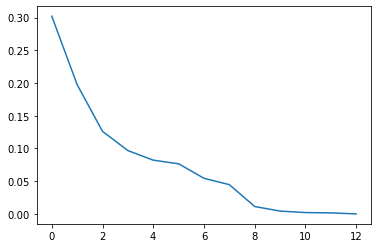

In [172]:
plt.figure()
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [173]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(dat_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

mergedDf = principalDf.merge(df_select.median_house_value, left_index=True, right_index=True)
mergedDf

,principal component 1,principal component 2,principal component 3,median_house_value
0,-0.465543,2.354356,1.738225,72000.0
1,-0.892761,0.761015,1.413305,274100.0
2,1.599188,2.837380,-1.169193,58300.0
3,-0.186329,1.114403,-2.279594,200000.0
4,0.620712,2.658347,2.692218,117900.0
...,...,...,...,...
11553,0.775154,-1.384424,0.127089,279200.0
11554,1.283122,0.380054,1.509763,134900.0
11555,6.045489,-0.484138,0.561231,115000.0
11556,0.083603,-1.457798,-0.085254,121900.0


In [153]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [155]:
features = ['longitude', 'latitude', 'housing_median_age','total_rooms',"total_bedrooms", "population", "households", "median_income", "INLAND","<1H OCEAN","NEAR OCEAN", "NEAR BAY", "ISLAND" ]

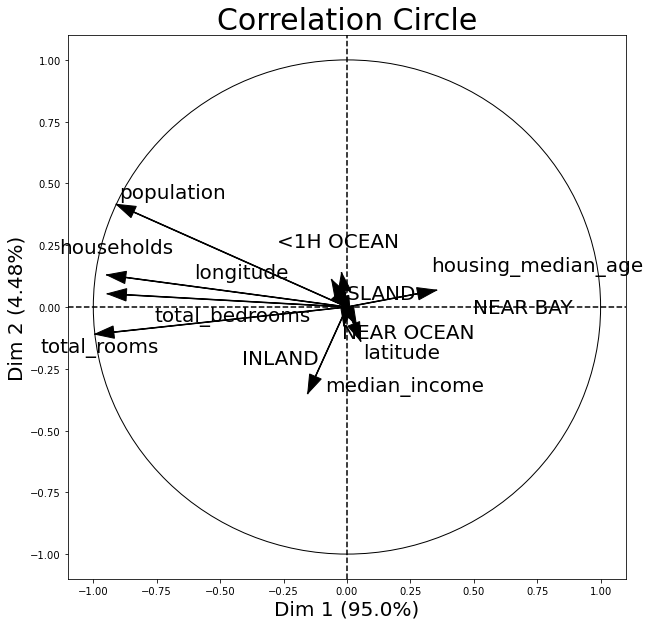

In [156]:
from mlxtend.plotting import plot_pca_correlation_graph

figure, correlation_matrix = plot_pca_correlation_graph(X_train,
                                                        features,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

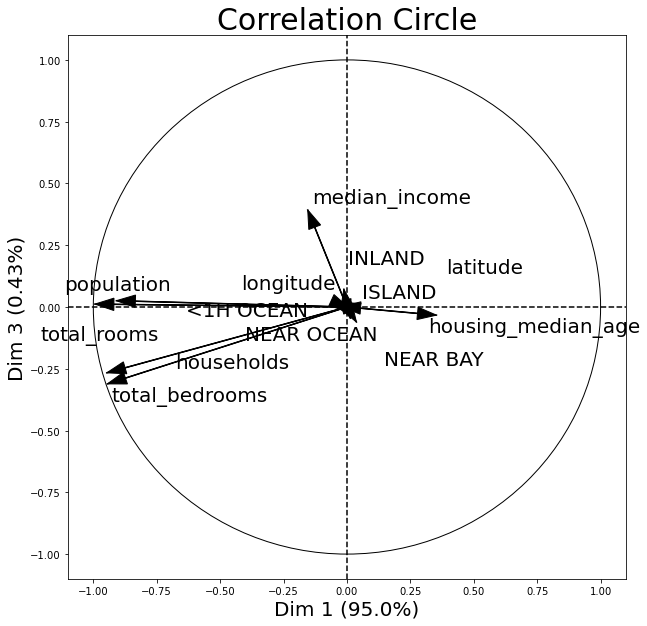

In [174]:
from mlxtend.plotting import plot_pca_correlation_graph

figure, correlation_matrix = plot_pca_correlation_graph(X_train,
                                                        features,
                                                        dimensions=(1, 3),
                                                        figure_axis_size=10)

In [137]:
#correlation 
corr = df_select.corr()

<AxesSubplot:>

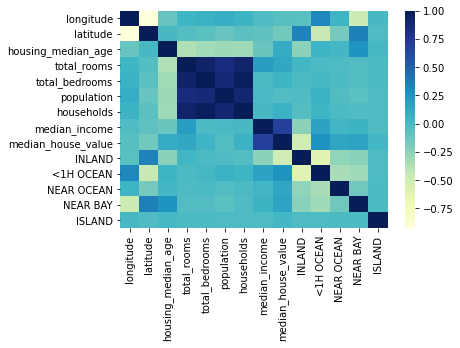

In [140]:
# Heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

In [138]:
# Unstack correlation matrix 
corr_df = corr.unstack().reset_index() 
corr_df

# rename columns
corr_df.columns = ['feature_1','feature_2', 'correlation'] 

# sort by correlation
corr_df.sort_values(by="correlation",ascending=False, inplace=True) 

# Remove self correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 
corr_df

,feature_1,feature_2,correlation
62,total_bedrooms,households,0.973847
88,households,total_bedrooms,0.973847
59,total_bedrooms,total_rooms,0.928719
46,total_rooms,total_bedrooms,0.928719
87,households,total_rooms,0.920225
...,...,...,...
134,INLAND,median_house_value,-0.488003
149,<1H OCEAN,INLAND,-0.607415
136,INLAND,<1H OCEAN,-0.607415
1,longitude,latitude,-0.924753


In [139]:
corr_target = corr_df[corr_df['feature_1'] == 'median_house_value']
corr_target

,feature_1,feature_2,correlation
119,median_house_value,median_income,0.689659
122,median_house_value,<1H OCEAN,0.259012
124,median_house_value,NEAR BAY,0.159640
123,median_house_value,NEAR OCEAN,0.142921
115,median_house_value,total_rooms,0.133218
114,median_house_value,housing_median_age,0.108626
118,median_house_value,households,0.063245
116,median_house_value,total_bedrooms,0.047084
125,median_house_value,ISLAND,0.026636
117,median_house_value,population,-0.027441


In [136]:
#VIF
vif_df = pd.DataFrame()
vif_df["vif_index"] = [variance_inflation_factor(df_select.values, i) for i in range(df_select.shape[1])]
vif_df["features"] = df_select.columns
vif_df

#encod_EDA

,vif_index,features
0,18.651288,longitude
1,20.558920,latitude
2,1.361695,housing_median_age
3,12.607954,total_rooms
4,26.653351,total_bedrooms
5,6.710867,population
6,27.949693,households
7,2.898633,median_income
8,2.831924,median_house_value
9,10707.467283,INLAND


In [141]:
#permutation
X = df_select.drop(["median_house_value"], axis=1)
y = df_select["median_house_value"]

In [142]:
#permutation
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.3, 
                                                    random_state=1)
Knn_model = KNeighborsRegressor(n_neighbors=10)
Knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [145]:
# Perform Permutation
permutation_score = permutation_importance(Knn_model, 
                                           X_test, y_test,
                                           
                                           random_state=1,
                                           n_repeats=100) 

# Unstack results
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 

importance_df.columns=['feature','feature importance']

# Order by importance
importance_df.sort_values(by="feature importance", ascending = False) 

,feature,feature importance
3,total_rooms,1.086479
5,population,0.449015
4,total_bedrooms,0.23897
6,households,0.173565
2,housing_median_age,0.007002
1,latitude,0.00036
7,median_income,0.000359
8,INLAND,0.000038
12,ISLAND,0.0
9,<1H OCEAN,-0.000006


In [ ]:
#New feature

# 6ème iteration avec Features selection

In [367]:
df_f.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,k
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,1
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,2
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,1
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,2
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,1


In [420]:
#On définit les features et la Target
X = df_f.drop(['median_house_value', "total_bedrooms", "households"], axis = 1)
y = df_f['median_house_value']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [421]:
# Séparation des colonnes numériques et categoriques
cat_trans = X_train.select_dtypes(include=["object"]).columns.tolist()
num_trans = X_train.select_dtypes(exclude=["object"]).columns.tolist()

# colonnes categorie pipeline
cat_preprocessing = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

# colonnes numeriques pipeline
num_preprocessing = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

# pipeline commun 

preprocessing = ColumnTransformer([
    ("num", num_preprocessing, num_trans),
    ("cat", cat_preprocessing, cat_trans)
])

In [422]:
# pipe finale preprocessing & regression 
pipe_final = Pipeline(
    [
        ('preprocess', preprocessing),
        ('regressor', KNeighborsRegressor(n_neighbors=5))
    ]
)

# measure model performance

#Fit the model with the train set
Kn_model = pipe_final.fit(X_train, y_train)

#Store predictions in a variable, for metrics uses
y_pred = pipe_final.predict(X_test)

# Evaluate the model with the test set
pipe_final.score(X_test, y_test)

r2 = pipe_final.score(X_test, y_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mae_pour = metrics.mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'r2 : {r2}')
print(f'mae : {mae}')
print(f'mae_pour : {mae_pour}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')

r2 : 0.9013698892017825
mae : 26570.574848607186
mae_pour : 0.1506311065093864
mse : 1286321295.276956
rmse : 35865.32162517097


In [ ]:
# #brut
# r2 : 0.9001576966530201
# mae : 26950.89471134437
# mae_pour : 0.15289737941492088
# mse : 1302130555.5204036
# rmse : 36085.04614823713
# # sans "total_bedrooms" : 
# r2 : 0.9007548735610298
# mae : 26822.964594267258
# mae_pour : 0.15241485021762977
# mse : 1294342250.634566
# rmse : 35976.968335791804
# # sans "house holder"
# r2 : 0.9013698892017825
# mae : 26570.574848607186
# mae_pour : 0.1506311065093864
# mse : 1286321295.276956
# rmse : 35865.32162517097

In [490]:
df_f2 = df_f.copy()
df_f2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,k
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,1
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,2
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,1
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,2
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,1


In [491]:
df_f2["ocean_proximity"].value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [478]:
# #regroupper <1H OCEAN et INLAND en IN
# replaced_df= df_f2.replace("INLAND", "IN")
# replaced_df = replaced_df.replace("<1H OCEAN", "IN")

In [492]:
#regroupper NEAR BAY et NEAR OCEAN en NEAR
replaced_df=df_f2.replace("NEAR BAY", "N")
replaced_df= replaced_df.replace("NEAR OCEAN", "N")

In [457]:
# #regroupper <1H OCEAN et INLAND en IN
# replaced_df=df_f2.replace("INLAND", "IN")
# replaced_df = replaced_df.replace("<1H OCEAN", "IN")
# #regroupper NEAR BAY et NEAR OCEAN en NEAR
# replaced_df= replaced_df.replace("NEAR BAY", "N")
# replaced_df= replaced_df.replace("NEAR OCEAN", "N")

In [485]:
# #regroupper NEAR BAY et NEAR OCEAN <1H OCEAN en NEAR
# replaced_df= df_f2.replace("NEAR BAY", "N")
# replaced_df= replaced_df.replace("NEAR OCEAN", "N")
# replaced_df= replaced_df.replace("<1H OCEAN", "N")

In [493]:
replaced_df["ocean_proximity"].value_counts()

<1H OCEAN    7312
INLAND       5235
N            3961
ISLAND          4
Name: ocean_proximity, dtype: int64

In [508]:
#On définit les features et la Target
X = replaced_df.drop(['median_house_value', "total_bedrooms", "households"], axis = 1)
y = replaced_df['median_house_value']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [509]:
# Séparation des colonnes numériques et categoriques
cat_trans = X_train.select_dtypes(include=["object"]).columns.tolist()
num_trans = X_train.select_dtypes(exclude=["object"]).columns.tolist()

# colonnes categorie pipeline
cat_preprocessing = Pipeline([
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse=False))
])

# colonnes numeriques pipeline
num_preprocessing = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler())
])

# pipeline commun 

preprocessing = ColumnTransformer([
    ("num", num_preprocessing, num_trans),
    ("cat", cat_preprocessing, cat_trans)
])

In [512]:
# pipe finale preprocessing & regression 
pipe_final_Kn = Pipeline(
    [
        ('preprocess', preprocessing),
        ('regressor', KNeighborsRegressor(n_neighbors=5))
    ]
)

# measure model performance

#Fit the model with the train set
Kn_model = pipe_final_Kn.fit(X_train, y_train)

#Store predictions in a variable, for metrics uses
y_pred = pipe_final_Kn.predict(X_test)

# Evaluate the model with the test set
pipe_final_Kn.score(X_test, y_test)

r2 = pipe_final_Kn.score(X_test, y_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mae_pour = metrics.mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f'r2 : {r2}')
print(f'mae : {mae}')
print(f'mae_pour : {mae_pour}')
print(f'mse : {mse}')
print(f'rmse : {rmse}')

r2 : 0.9013210803316541
mae : 26547.48603148971
mae_pour : 0.15062597547734294
mse : 1286957854.3210092
rmse : 35874.19482470665


In [ ]:
# #regroupper NEAR BAY et NEAR OCEAN en NEAR

# replaced_df=df_f2.replace("NEAR BAY", "N")
# replaced_df= replaced_df.replace("NEAR OCEAN", "N")

# r2 : 0.9013210803316541
# mae : 26547.48603148971
# mae_pour : 0.15062597547734294
# mse : 1286957854.3210092
# rmse : 35874.19482470665

In [ ]:
# Combinaison finale retenue: regroupper NEAR BAY et NEAR OCEAN
# Mae = 26547 dollars 

### Pickle 

In [513]:
with open("Kn_pickle.pkl", "wb") as file:
    pickle.dump(pipe_final_Kn, file)